# Preparación de los datos
Irene Pico López

In [1]:
import pandas as pd
import talib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

#### 1. Cargamos los datos:

In [2]:
# Cargar los datos desde un archivo HDF5
ibex35 = pd.read_hdf('ibex35.h5', key='rawData')
ibex35

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200
...,...,...,...,...,...,...
2024-07-25,11133.299805,11158.099609,11012.000000,11145.599609,11145.599609,120027800
2024-07-26,11102.799805,11177.599609,11068.700195,11165.900391,11165.900391,86560000
2024-07-29,11221.799805,11254.200195,11089.700195,11117.799805,11117.799805,76497300


#### 2. Creación de características adicionales:

In [3]:
# Crear características adicionales de Rendimientos
ibex35['ret_1'] = ibex35['Adj Close'].pct_change(1)
ibex35['ret_5'] = ibex35['Adj Close'].pct_change(5)
ibex35['ret_21'] = ibex35['Adj Close'].pct_change(21)
ibex35['ret_63'] = ibex35['Adj Close'].pct_change(63)

# Obtención de Indicadores técnicos
ibex35['PPO'] = talib.PPO(ibex35['Adj Close'])
ibex35['NATR'] = talib.NATR(ibex35['High'], ibex35['Low'], ibex35['Adj Close'])
ibex35['RSI'] = talib.RSI(ibex35['Adj Close'])
upperband, middleband, lowerband = talib.BBANDS(ibex35['Adj Close'])
ibex35['bbl'] = ibex35['Adj Close'] / lowerband
ibex35['bbu'] = upperband / ibex35['Adj Close']

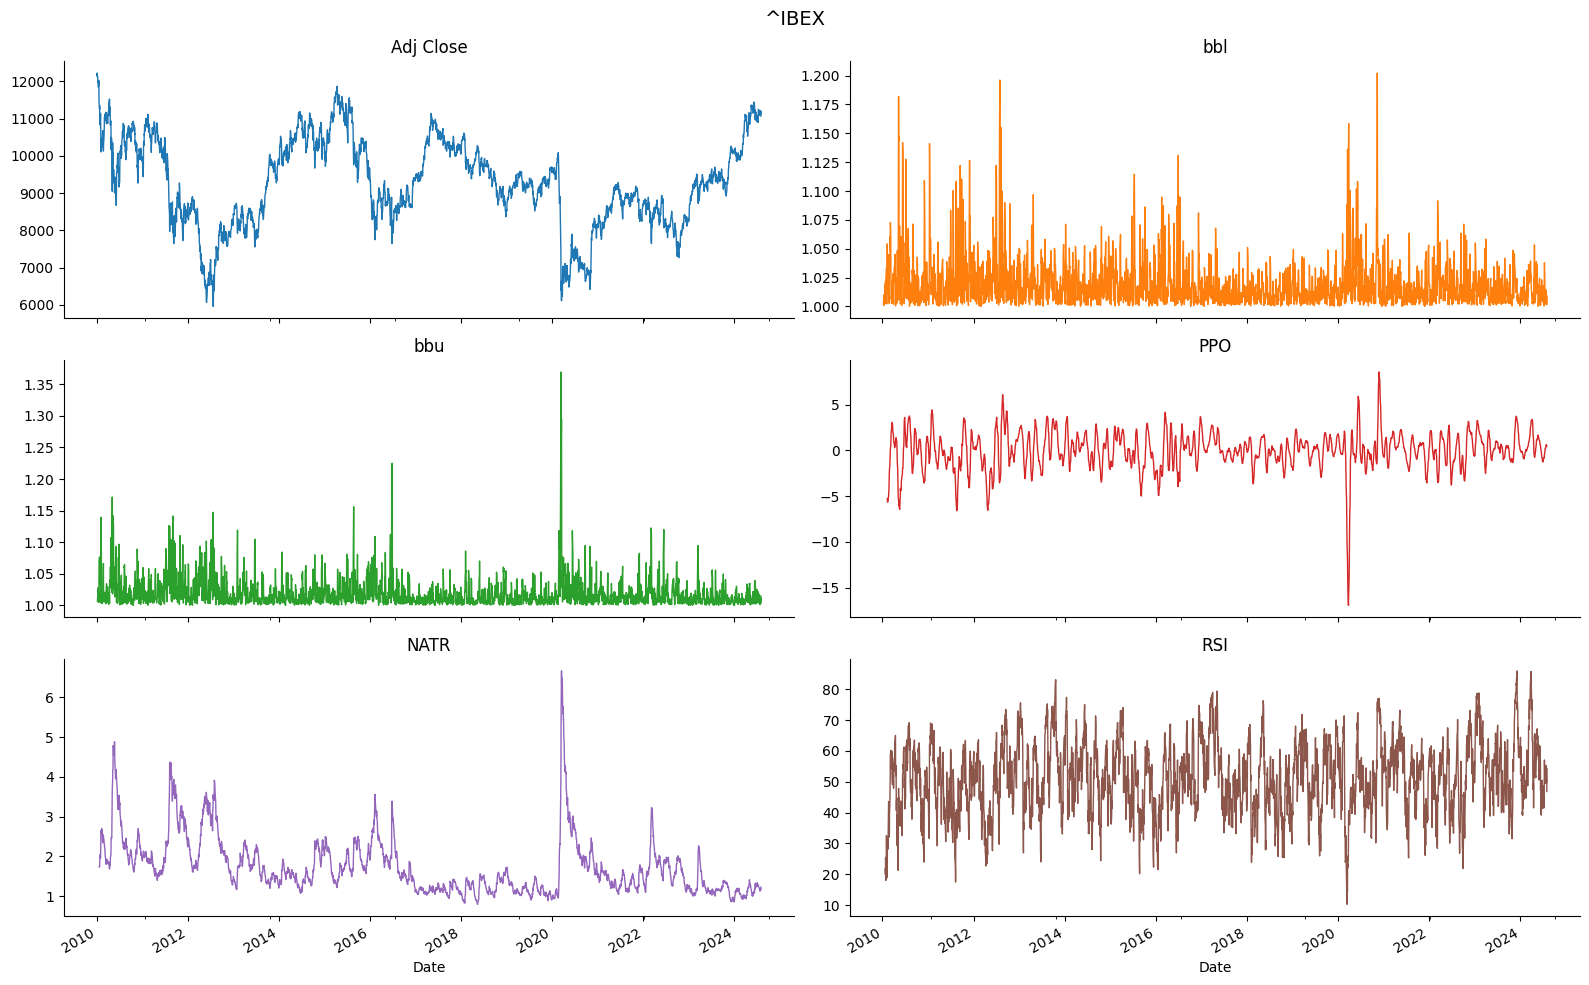

In [4]:
## Visualización de los Indicadores técnicos
####################################################
# Definir el índice de las columnas y los indicadores a graficar
indicators = ['Adj Close', 'bbl', 'bbu', 'PPO', 'NATR', 'RSI']
ticker = '^IBEX'  # Nombre del ticker para el título

# Crear gráficos de línea para cada indicador en subplots
ibex35[indicators].plot(
    lw=1, 
    subplots=True, 
    figsize=(16, 10), 
    title=indicators, 
    layout=(3, 2), 
    legend=False
)

# Ajustes adicionales para la visualización
plt.suptitle(ticker, fontsize=14)
sns.despine()
plt.tight_layout()
#plt.subplots_adjust(top=.95)

# Guardar el gráfico en un archivo
plt.savefig('ibex35_indicadores.png', format='png', dpi=300)

plt.show()

#### 3. Creación de indicadores temporales:

In [5]:
# Añadir indicadores temporales
ibex35['weekday'] = ibex35.index.weekday
ibex35['month'] = ibex35.index.month
ibex35['year'] = ibex35.index.year

ibex35

,Open,High,Low,Close,Adj Close,Volume,ret_1,ret_5,ret_21,ret_63,PPO,NATR,RSI,bbl,bbu,weekday,month,year
Date,,,,,,,,,,,,,,,,,,
2010-01-04,11986.500000,12145.099609,11986.099609,12145.099609,12145.086914,184200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,2010
2010-01-05,12141.799805,12240.500000,12139.799805,12204.400391,12204.387695,238400,0.004883,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2010
2010-01-06,12216.400391,12230.700195,12147.599609,12222.500000,12222.487305,123800,0.001483,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,2010
2010-01-07,12163.000000,12199.700195,12079.099609,12166.299805,12166.287109,192400,-0.004598,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,1,2010
2010-01-08,12218.000000,12232.200195,12079.900391,12163.000000,12162.987305,213200,-0.000271,NaN,NaN,NaN,NaN,NaN,NaN,1.003298,1.006125,4,1,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,11133.299805,11158.099609,11012.000000,11145.599609,11145.599609,120027800,-0.005754,-0.000170,0.010435,-0.000807,0.564715,1.179945,51.472277,1.007186,1.009708,3,7,2024
2024-07-26,11102.799805,11177.599609,11068.700195,11165.900391,11165.900391,86560000,0.001821,0.007071,0.019577,0.005864,0.633718,1.163334,52.546057,1.004567,1.006287,4,7,2024
2024-07-29,11221.799805,11254.200195,11089.700195,11117.799805,11117.799805,76497300,-0.004308,-0.002333,0.015909,0.024267,0.564647,1.190599,49.737815,1.001889,1.011351,0,7,2024


#### 4. Eliminación de filas con valores nulos y estandarización:

In [6]:
# Eliminar filas con valores nulos
ibex35.dropna(inplace=True)

In [7]:
# Eliminamos variables que no vamos a emplear más
ibex35 = ibex35.drop(['Open', 'High', 'Low', 'Close'], axis=1)

In [8]:
# Estandarización de nuestras características
scaler = StandardScaler()
scaled_features = scaler.fit_transform(ibex35.drop(['Adj Close', 'weekday', 'month', 'year'], axis=1))
scaled_data = pd.DataFrame(scaled_features, index=ibex35.index, columns=ibex35.drop(['Adj Close', 'weekday', 'month', 'year'], axis=1).columns)
scaled_data['weekday'] = ibex35['weekday']
scaled_data['month'] = ibex35['month']
scaled_data['year'] = ibex35['year']
scaled_data['adj_close'] = ibex35['Adj Close']

In [9]:
## VISUALIZAMOS DATAFRAME FINAL
scaled_data

,Volume,ret_1,ret_5,ret_21,ret_63,PPO,NATR,RSI,bbl,bbu,weekday,month,year,adj_close
Date,,,,,,,,,,,,,,
2010-04-01,-2.141847,1.318768,-0.085699,0.619778,-1.025903,0.504449,0.140067,0.254526,-0.030132,-0.422647,3,4,2010,11067.889648
2010-04-06,-2.141462,0.606898,0.250797,0.633941,-0.991050,0.324174,0.130048,0.487515,0.456448,-0.576080,1,4,2010,11160.587891
2010-04-07,-2.140970,0.194493,0.282436,0.236609,-0.978313,0.220909,0.077016,0.564205,0.662467,-0.480975,2,4,2010,11191.288086
2010-04-08,-2.141080,-0.760624,0.271315,-0.034342,-1.035780,0.143140,0.113921,0.181182,0.017984,-0.005131,3,4,2010,11076.289062
2010-04-09,-2.140523,2.097181,1.570535,0.580990,-0.745470,0.190088,0.155543,0.932415,0.992323,-0.781389,4,4,2010,11394.188477
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-25,-0.918050,-0.429065,-0.021445,0.148351,-0.058846,0.271491,-0.772846,0.013195,-0.632005,-0.441368,3,7,2024,11145.599609
2024-07-26,-1.259650,0.126352,0.217388,0.305700,0.014562,0.304903,-0.795596,0.107393,-0.756628,-0.587608,4,7,2024,11165.900391
2024-07-29,-1.362358,-0.323048,-0.092772,0.242561,0.217047,0.271458,-0.758253,-0.138961,-0.884014,-0.371154,0,7,2024,11117.799805


#### 5. Almacenamiento de los datos tratados:

In [10]:
# Guardar el conjunto de datos definitivo en HDF5
scaled_data.to_hdf('ibex35.h5', key='datos_tratados', mode='a')

In [11]:
# Mostramos todas las claves en el archivo
with pd.HDFStore('ibex35.h5', mode='r') as hdf:
    print(hdf.keys())  

['/datos_tratados', '/rawData']
